<a href="https://colab.research.google.com/github/SherifNabil-Eng/PoweBI_Acct_Mgm/blob/main/Stocks_prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initialization**

In [76]:
! pip install watermark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
!pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
from google.colab import drive
drive.mount('/content/gdrive')
#drive.mount('/content/drive', force_remount=force_remount)
import os;
os.chdir("/content/gdrive/My Drive/Colab Notebooks/")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [81]:
import os
import sys

import pandas as pd
import pandas_datareader.data as web
import numpy as np

from pandas_datareader import data as pdr
import yfinance as yf

from datetime import datetime
from datetime import timedelta as tdelta


import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.tsa.seasonal as statses
import scipy.stats as scs


import matplotlib.pyplot as plt
import matplotlib as mpl

import watermark

from datetime import datetime, timedelta

import scipy

from scipy import stats

import sklearn
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings ("ignore")

from collections import Counter
from pprint import pprint
from pandas.plotting import autocorrelation_plot

np.random.seed (1234)

import math

import tensorflow as tf

import keras

from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import SimpleRNN ,GRU,LSTM
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
from keras.layers import *
from keras.models import load_model


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

plt.rcParams['figure.figsize'] =15,10

%load_ext watermark
%matplotlib inline
p = print

p('Machine: {} {}\n'.format(os.uname().sysname,os.uname().machine))
p(sys.version)

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Machine: Linux x86_64

3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]


In [82]:
# get versions of different packages 

%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.16
IPython version      : 7.9.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.10.147+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

Git hash: 

numpy            : 1.21.6
tensorflow       : 2.9.2
pandas           : 1.3.5
statsmodels      : 0.12.2
watermark        : 2.3.1
google           : 2.0.3
pandas_datareader: 0.10.0
matplotlib       : 3.2.2
sys              : 3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]
yfinance         : 0.2.3
keras            : 2.9.0
sklearn          : 1.0.2
scipy            : 1.7.3



# **`Ticker Information`**

In [222]:
y_symbol = ['GOOG']



In [223]:
ticker_y = yf.Ticker(y_symbol[0])
ticker_holders_df = ticker_y.major_holders
ticker_holders_df

,0,1
0,0.04%,% of Shares Held by All Insider
1,64.37%,% of Shares Held by Institutions
2,64.39%,% of Float Held by Institutions
3,4151,Number of Institutions Holding Shares


In [224]:
ticker_instit_holders_df = ticker_y.institutional_holders
ticker_instit_holders_df

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",422194039,2022-09-29,0.0694,37220628024
1,Blackrock Inc.,364589580,2022-09-29,0.0599,32142218707
2,Price (T.Rowe) Associates Inc,203484912,2022-09-29,0.0334,17939230587
3,State Street Corporation,196897894,2022-09-29,0.0324,17358519056
4,"FMR, LLC",137342098,2022-09-29,0.0226,12108079862
5,"Geode Capital Management, LLC",96492465,2022-09-29,0.0159,8506776067
6,JP Morgan Chase & Company,77609680,2022-09-29,0.0128,6842069673
7,Capital International Investors,77092385,2022-09-29,0.0127,6796464943
8,"AllianceBernstein, L.P.",63184850,2022-09-29,0.0104,5570376607
9,Northern Trust Corporation,61949645,2022-09-29,0.0102,5461480930


In [225]:
q_earnings_df= ticker_y.quarterly_earnings

In [226]:
recommendations_df=ticker_y.recommendations

In [227]:
analyst_price_target_df=ticker_y.analyst_price_target

In [228]:
revenue_forecasts_df=ticker_y.revenue_forecasts

In [229]:
news_df = pd.DataFrame (ticker_y.get_news())

## **Ticker Stocks Info**

In [230]:
yf.pdr_override()


startdate_1Y = datetime(2022,1,1)
startdate_3Y = datetime(2019,1,1)
startdate_5Y = datetime(2017,1,1)
startdate_7Y = datetime(2015,1,1)
startdate_12Y = datetime(2010,1,1)

enddate = datetime(2022,12,30)
data = pdr.get_data_yahoo(y_symbol, start=startdate_12Y, end=enddate)


#data_sub_1Y= data[startdate_1Y:]
#data_sub_3Y= data[startdate_3Y:]
#data_sub_5Y= data[startdate_5Y:]


[*********************100%***********************]  1 of 1 completed


In [231]:
print (data)

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2010-01-04  15.615220  15.678981  15.547723  15.610239  15.610239   78541293
2010-01-05  15.620949  15.637387  15.480475  15.541497  15.541497  120638494
2010-01-06  15.588072  15.588072  15.102393  15.149715  15.149715  159744526
2010-01-07  15.178109  15.193053  14.760922  14.797037  14.797037  257533695
2010-01-08  14.744733  15.024933  14.672753  14.994298  14.994298  189680313
...               ...        ...        ...        ...        ...        ...
2022-12-22  88.930000  89.180000  86.940002  88.260002  88.260002   23656100
2022-12-23  87.620003  90.099998  87.620003  89.809998  89.809998   17815000
2022-12-27  89.309998  89.500000  87.535004  87.930000  87.930000   15470900
2022-12-28  87.500000  88.519997  86.370003  86.459999  86.459999   17879600
2022-12-29  87.029999  89.364998  86.989998  88.949997  88.949997   18280700

In [232]:
print (data['Adj Close'].head())
print (data['Adj Close'].tail())

Date
2010-01-04    15.610239
2010-01-05    15.541497
2010-01-06    15.149715
2010-01-07    14.797037
2010-01-08    14.994298
Name: Adj Close, dtype: float64
Date
2022-12-22    88.260002
2022-12-23    89.809998
2022-12-27    87.930000
2022-12-28    86.459999
2022-12-29    88.949997
Name: Adj Close, dtype: float64


# **Desrcibe Ticker**

In [233]:
def describe_ticker(ticker_series,output_path):

  no_datapoints = ticker_series.count()
  print ("Ticker Summary",ticker_series.describe())
  fig,ax = plt.subplots (1,3,figsize=(25,15))

  
  ticker_cons = pd.DataFrame(ticker_series,index=ticker_series.index)
  ticker_cons['diff'] = ticker_cons.pct_change().values
  ticker_cons['diff'][0]=0

  ax[0].plot (ticker_series)
  ax[0].set_xlabel("Date")
  ax[0].set_ylabel ("Stock price")
  #fig.savefig('./Stock Prediction/Stock.png')

    
  ax[1].hist(ticker_cons['diff'],bins=100)
  ax[1].set_xlabel ("YoY")
  ax[1].set_ylabel ("count")
  #ax[1].savefig('./Stock Prediction/Stock_Change_Counts.png')

  ax[2].plot (ticker_cons['diff'])
  ax[2].set_xlabel("Date")
  ax[2].set_ylabel ("Changes")
  
  
  fig.savefig(output_path)
  plt.close(fig)

  return

In [234]:
def Y_retrun_ticker (ticker_series,start_date,end_date,msg):

  
  print (msg,((ticker_series.loc[end_date]/ticker_series.loc[start_date])-1)*100,"%")

In [235]:
def ticker_decompose (ticker_series,periods):
  
  return (statses.seasonal_decompose(ticker_series,model="additive",period=periods))

In [236]:
def plot_decom (trend,seasonal,residual,output_path):

  fig,ax = plt.subplots (3,1,figsize=(20,10))

  ax[0].plot (trend)
  ax[1].plot(seasonal)
  ax[2].plot (residual)

  fig.savefig(output_path)

  return

In [237]:
def get_min_max(ticker,freq="Q"):

  return ticker.resample (freq).min(),ticker.resample (freq).max()

Ticker Summary count    3271.000000
mean       48.976977
std        36.173748
min        10.861040
25%        20.193933
50%        37.585999
75%        61.476999
max       150.709000
Name: Adj Close, dtype: float64
Year to date returns are -38.68667409510832 %
3 Years to date returns are 75.08807450414494 %
5 Years to date returns are 126.29556756760954 %
7 Years to date returns are 239.91048484206638 %
12 Years to date returns are 469.8182890306162 %


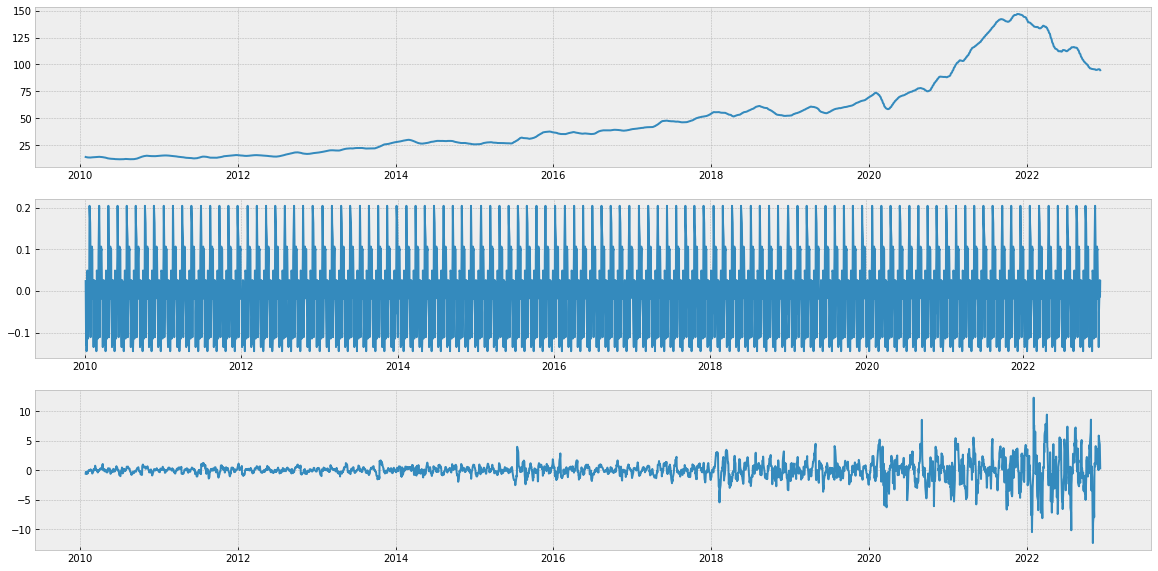

In [293]:
ticker = data['Adj Close']

ticker.index = data['Adj Close'].index
periods = 30
freq="Q"
startdate_1Y_sub ="2022-1-3"
startdate_3Y_sub ="2019-1-3"
startdate_5Y_sub ="2017-1-3"
startdate_7Y_sub ='2015-1-2'
startdate_12Y_sub ='2010-1-4'
Stock_desc_output_path = './Stocks Prediction/Stock_'+y_symbol[0]+'_desc.png'
Stock_decomposed_output_path = './Stocks Prediction/Stock_'+y_symbol[0]+'_decomp.png'
Stock_prediction_output_path = './Stocks Prediction/Stock_'+y_symbol[0]+'_pred.png'

enddate_sub =(enddate- tdelta(1)).strftime ("%Y-%m-%d")


describe_ticker (ticker,Stock_desc_output_path)
Y_retrun_ticker (ticker,startdate_1Y_sub,enddate_sub,"Year to date returns are")
Y_retrun_ticker (ticker,startdate_3Y_sub,enddate_sub,"3 Years to date returns are")
Y_retrun_ticker (ticker,startdate_5Y_sub,enddate_sub,"5 Years to date returns are")
Y_retrun_ticker (ticker,startdate_7Y_sub,enddate_sub,"7 Years to date returns are")
Y_retrun_ticker (ticker,startdate_12Y_sub,enddate_sub,"12 Years to date returns are")

decomposed = ticker_decompose(ticker,periods)


ticker_trend=decomposed.trend
ticker_seasonal = decomposed.seasonal
ticker_res = decomposed.resid


plot_decom (ticker_trend,ticker_seasonal,ticker_res,Stock_decomposed_output_path)



,Min,Max
Date,,
2010-03-31,13.111604,15.610239
2010-06-30,11.082211,14.826925
2010-09-30,10.861040,13.210733
2010-12-31,13.009985,15.610737
2011-03-31,13.875491,15.931037
2011-06-30,11.827667,14.739752
2011-09-30,12.227170,15.504884
2011-12-31,12.341740,16.087200
2012-03-31,14.149464,16.644611


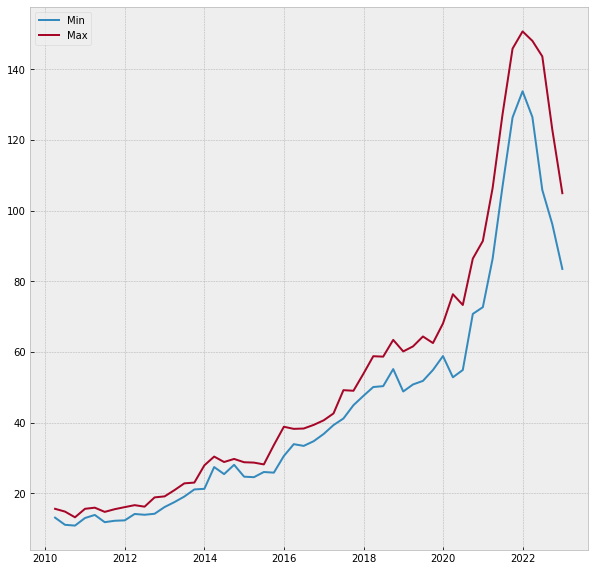

In [239]:
# get min and max / freq


min_ticker,max_ticker=get_min_max(ticker,freq)

min_max_data = {"Min":min_ticker,
                "Max":max_ticker}

min_max_df = pd.DataFrame (min_max_data,index=min_ticker.index)

fig,ax = plt.subplots (1,1,figsize=(10,10))

ax.plot (min_max_df)
ax.legend(["Min","Max"])

min_max_df

Volume Info

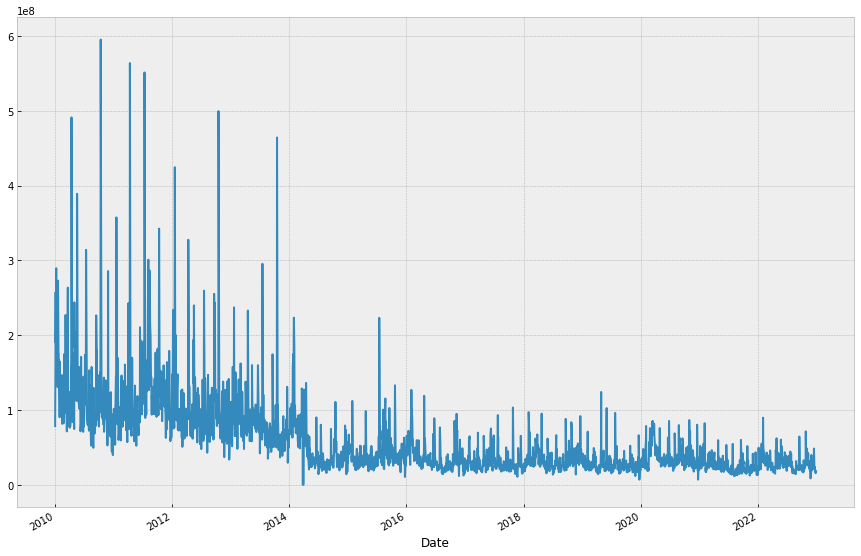

In [240]:
ticker_Volume =data['Volume']
plt.rcParams['figure.figsize']=15,10
ticker_Volume.plot ()

In [241]:
print (ticker_Volume.head())
print (ticker_Volume.tail())

Date
2010-01-04     78541293
2010-01-05    120638494
2010-01-06    159744526
2010-01-07    257533695
2010-01-08    189680313
Name: Volume, dtype: int64
Date
2022-12-22    23656100
2022-12-23    17815000
2022-12-27    15470900
2022-12-28    17879600
2022-12-29    18280700
Name: Volume, dtype: int64


In [242]:
print ("Max volume was",ticker_Volume.max(),"on date",str(ticker_Volume.index[ticker_Volume.values==ticker_Volume.max()])[16:26])
print ("Min volume was",ticker_Volume.min(),"on date",str(ticker_Volume.index[ticker_Volume.values==ticker_Volume.min()])[16:26])

Max volume was 595214680 on date 2010-10-15
Min volume was 158434 on date 2014-04-01


In [243]:
ticker_Volume.describe()

count    3.271000e+03
mean     5.783268e+07
std      5.064014e+07
min      1.584340e+05
25%      2.608200e+07
50%      3.735200e+07
75%      7.831244e+07
max      5.952147e+08
Name: Volume, dtype: float64

In [244]:
ticker_Volume[-1]

18280700

In [245]:
print ("overall volume avg is ",ticker_Volume.mean())
print ("Current year avg is",ticker_Volume[startdate_1Y_sub:enddate].mean())

overall volume avg is  57832677.160501376
Current year avg is 28660963.2


# **Calls and Puts**

In [246]:
option_chain= ticker_y.option_chain()
options_calls=option_chain.calls
print (options_calls.columns)
options_puts=option_chain.puts
print (options_puts.columns)

options_calls['lastTradeDate']
options_calls['lastTradeDate'] = options_calls['lastTradeDate'].dt.tz_localize(None)
options_puts['lastTradeDate'] = options_puts['lastTradeDate'].dt.tz_localize(None)


#options_df =pd.DataFrame (option_chain)


Index(['contractSymbol', 'lastTradeDate', 'strike', 'lastPrice', 'bid', 'ask',
       'change', 'percentChange', 'volume', 'openInterest',
       'impliedVolatility', 'inTheMoney', 'contractSize', 'currency'],
      dtype='object')
Index(['contractSymbol', 'lastTradeDate', 'strike', 'lastPrice', 'bid', 'ask',
       'change', 'percentChange', 'volume', 'openInterest',
       'impliedVolatility', 'inTheMoney', 'contractSize', 'currency'],
      dtype='object')


# **Prediction**

**Data Preparation**

In [247]:
# shift data by Window size day

#shift_factor = 1

# LSTM & GRU Window size
WINDOW_SIZE = 5


# start the forecasting of LSTM by 03rd Jan 2022
series = ticker['2022-07-03':].pct_change().values.reshape(-1,1)


values = series.reshape (-1,1)
scaler = MinMaxScaler (feature_range=(-1,1))
values = scaler.fit_transform(values)
#X = values [:-1*shift_factor]
#X[0]=0
#y=values [shift_factor:]

X = values [:-1*WINDOW_SIZE]
X[0:WINDOW_SIZE]=0.0
y=values [WINDOW_SIZE:]


#LSTM and GRUs start and end dates
series_start_date = '2022-07-03'
series_end_date = '2022-12-20'



#LSTM prediction parameters 
LSTM_series_start_predict = '2022-12-21'
LSTM_prediction_period = 15
LSTM_series_prediction_timeframe = pd.bdate_range(start=LSTM_series_start_predict, periods=LSTM_prediction_period, freq='C',holidays=['2022-11-23','2022-12-25','2023-01-01','2023-01-02'])


#GRU prediction parameters 
GRU_series_start_predict = '2022-12-21'
GRU_prediction_period = 15
GRU_series_prediction_timeframe = pd.bdate_range(start=GRU_series_start_predict, periods=GRU_prediction_period, freq='C',holidays=['2022-11-23','2022-12-25','2023-01-01','2023-01-02'])

# ARMA start and end dates 
ARMA_series_start_date ='2022-07-03'
ARMA_series_end_date = '2022-12-31'

# ARMA prediction parameters 
ARMA_series_start_predict = '2022-12-21'
ARMA_prediction_period = 15

In [248]:
print ("series head is \n",series[0:5])
print ("series tail is \n",series[-5:-1])
print ("series last item is \n ",series[244:248])

series head is 
 [[        nan]
 [ 0.01164751]
 [ 0.035521  ]
 [ 0.00722934]
 [-0.03034076]]
series tail is 
 [[-0.02204984]
 [ 0.0175617 ]
 [-0.02093305]
 [-0.01671786]]
series last item is 
  []


In [249]:
n_points = len (series)
train_points = int (2/3*n_points)+1
X_train , X_test = X[:train_points],X[train_points:]
y_train,y_test = y[:train_points],y[train_points:]

print ("full dataset is {} points ".format (len(series)))
print ("n points is ",train_points)
print ("we have x {} and y {} training points".format(len(X_train),len(y_train)))
print ("we have x {} and y {} testing points".format(len(X_test),len(y_test)))

full dataset is 125 points 
n points is  84
we have x 84 and y 84 training points
we have x 36 and y 36 testing points


# **LSTM Implementation Final**

series is  Date
2022-07-05    113.887001
2022-07-06    115.213501
2022-07-07    119.306000
2022-07-08    120.168503
2022-07-11    116.522499
                 ...    
2022-12-14     95.309998
2022-12-15     91.199997
2022-12-16     90.860001
2022-12-19     89.150002
2022-12-20     89.629997
Name: Adj Close, Length: 119, dtype: float64


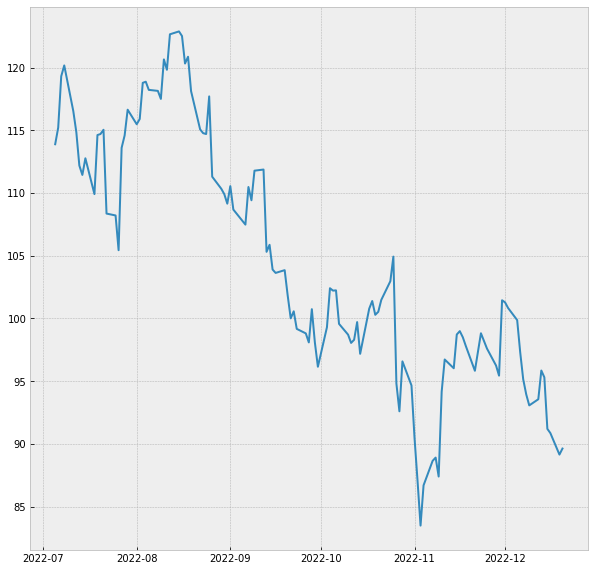

In [250]:
# Prepare LSTM Data


#series to train the LSTM on
series = ticker[series_start_date:series_end_date]
print ("series is ",series)
fig,ax = plt.subplots (1,1,figsize=(10,10))
ax.plot (series)

In [251]:

def ticker_to_X_y(series,window_size=5):

  if isinstance(series, pd.Series):
        series_as_np = series.to_numpy()
  
  X =[]
  y=[]

  for i in range (len(series)-window_size):

    row = [[a] for a in series[i:i+window_size]]
    X.append (row)
    label = series [i+window_size]
    y.append (label)

  return np.array(X),np.array (y)

#print ("type of ticker is ",type (ticker))
X,y = ticker_to_X_y(series,WINDOW_SIZE)



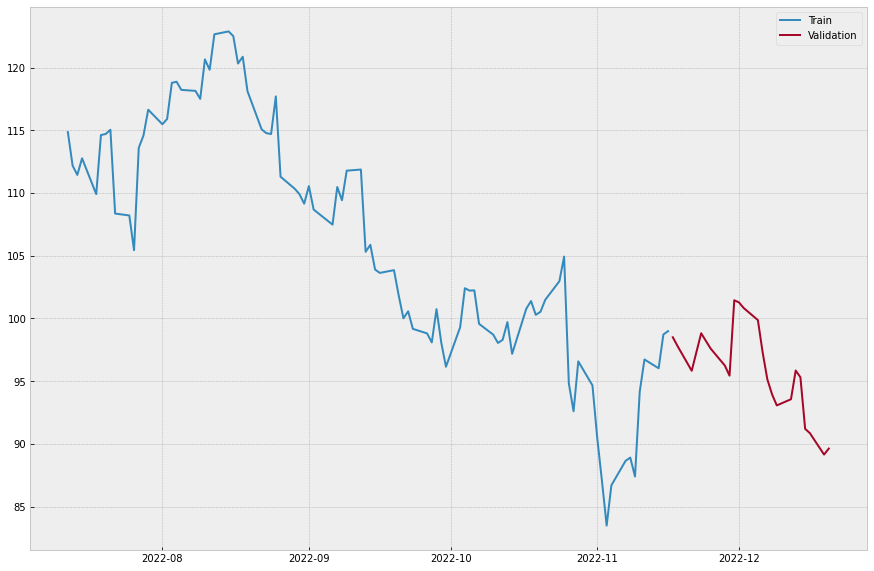

In [252]:
# Make train and Validation sets

train_percentange = .8
train_len = int (.8*len(X))
X_train,y_train = X[:train_len],y[:train_len]
X_val,y_val = X[train_len:],y[train_len:]


plt.plot(series[WINDOW_SIZE:train_len+WINDOW_SIZE].index, y_train)
plt.plot(series [train_len+WINDOW_SIZE:].index ,y_val)

plt.legend(['Train', 'Validation'])


In [253]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras import layers



#LSTM parameters 
LSTM_Layer1_nodes = 64
LSTM_Layer2_nodes = 32
LSTM_Layer3_nodes = 32
LSTM_output_Layer = 1
LSTM_epochs=300

keras.backend.clear_session()

LSTM_model = Sequential([layers.Input((WINDOW_SIZE, 1)),
                    layers.LSTM(LSTM_Layer1_nodes),
                    layers.Dense(LSTM_Layer2_nodes, activation='relu'),
                    layers.Dense(LSTM_Layer3_nodes, activation='relu'),
                    layers.Dense(LSTM_output_Layer)])

LSTM_model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

LSTM_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=LSTM_epochs)

Epoch 1/300
3/3 [==============================] - 3s 332ms/step - loss: 11268.3877 - mean_absolute_error: 105.7157 - val_loss: 9143.3896 - val_mean_absolute_error: 95.5581
Epoch 2/300
3/3 [==============================] - 0s 21ms/step - loss: 11223.2422 - mean_absolute_error: 105.5031 - val_loss: 9105.3262 - val_mean_absolute_error: 95.3588
Epoch 3/300
3/3 [==============================] - 0s 31ms/step - loss: 11179.6953 - mean_absolute_error: 105.2964 - val_loss: 9063.1211 - val_mean_absolute_error: 95.1373
Epoch 4/300
3/3 [==============================] - 0s 23ms/step - loss: 11131.0801 - mean_absolute_error: 105.0660 - val_loss: 9016.2334 - val_mean_absolute_error: 94.8906
Epoch 5/300
3/3 [==============================] - 0s 21ms/step - loss: 11076.8320 - mean_absolute_error: 104.8077 - val_loss: 8967.2803 - val_mean_absolute_error: 94.6322
Epoch 6/300
3/3 [==============================] - 0s 21ms/step - loss: 11023.9893 - mean_absolute_error: 104.5533 - val_loss: 8919.5732 - 

In [254]:
def train_prediction_fn (model,training_data,training_observations,training_date_range):

  train_predictions = model.predict(training_data).flatten()
  plt.plot(training_date_range, train_predictions)
  plt.plot(training_date_range, training_observations)
  plt.legend(['Training Predictions', 'Training Observations'])

  return train_predictions

3/3 [==============================] - 1s 7ms/step


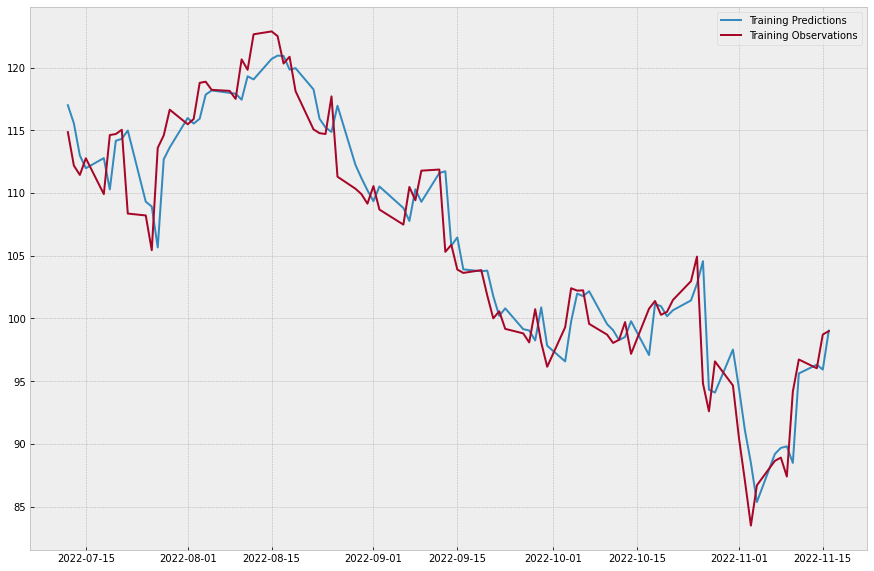

In [255]:
LSTM_train_predictions= train_prediction_fn (LSTM_model,X_train,y_train,series[WINDOW_SIZE:train_len+WINDOW_SIZE].index)

In [256]:
def validate_prediction_fn (model,validation_data,validation_observations,validation_date_range):
  val_predictions = model.predict(validation_data).flatten()

  plt.plot(validation_date_range, val_predictions)
  plt.plot(validation_date_range, validation_observations)
  plt.legend(['Validation Predictions', 'Validation Observations'])

  return val_predictions

1/1 [==============================] - 0s 25ms/step


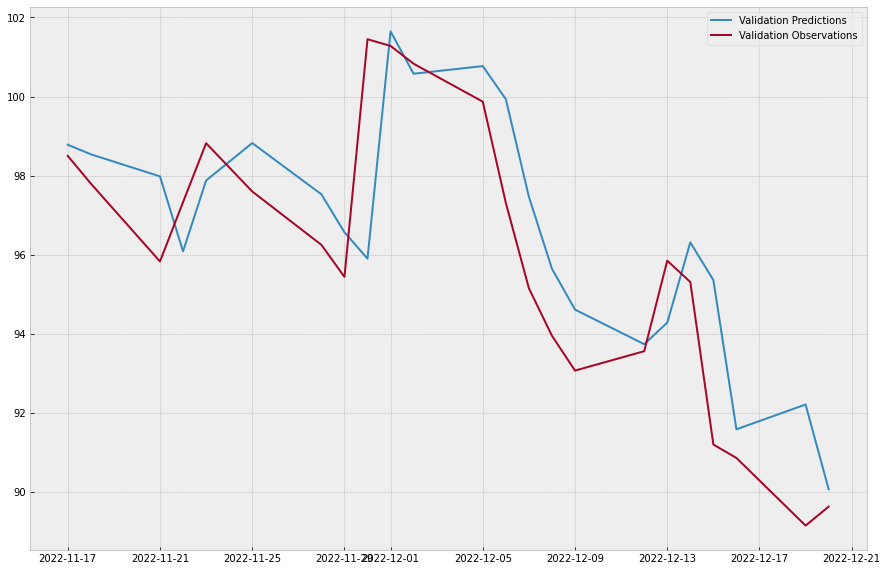

In [257]:
LSTM_val_predictions =validate_prediction_fn (LSTM_model,X_val,y_val,series [train_len+WINDOW_SIZE:].index)

In [258]:
# Make predictions for 15 business days after the validation dataset
from copy import deepcopy
# training_data = X_train
#training_date_range = series [train_len+WINDOW_SIZE:].index


def prediction_future_fn (series_prediction_timeframe,model,training_data,training_date_range):

  
  # make the LSTM predict between 21th Dec and 30th Dec for 15 business days after
  

  recursive_predictions = []
  recursive_dates = np.concatenate([training_date_range, series_prediction_timeframe])


  last_window = deepcopy(training_data[-1])
  for target_date in recursive_dates:

    #print ("last window is ",last_window)
  
    next_prediction = model.predict(np.array([last_window])).flatten()
    
    #print ("next prediction is ",next_prediction)
    recursive_predictions.append(next_prediction)
    last_window[0:-1] = last_window[1:]
    last_window[-1] = next_prediction

  return recursive_dates,recursive_predictions



In [259]:


LSTM_recursive_dates,LSTM_recursive_predictions = prediction_future_fn (LSTM_series_prediction_timeframe,LSTM_model,X_train,series [train_len+WINDOW_SIZE:].index)

1/1 [==============================] - 0s 26ms/step


In [260]:
#LSTM_recursive_dates
LSTM_recursive_predictions

[array([99.027115], dtype=float32),
 array([98.81786], dtype=float32),
 array([98.84628], dtype=float32),
 array([98.96546], dtype=float32),
 array([99.05714], dtype=float32),
 array([99.129196], dtype=float32),
 array([99.19848], dtype=float32),
 array([99.26597], dtype=float32),
 array([99.32981], dtype=float32),
 array([99.38994], dtype=float32),
 array([99.44683], dtype=float32),
 array([99.50076], dtype=float32),
 array([99.55189], dtype=float32),
 array([99.60039], dtype=float32),
 array([99.6464], dtype=float32),
 array([99.69009], dtype=float32),
 array([99.73159], dtype=float32),
 array([99.77105], dtype=float32),
 array([99.80855], dtype=float32),
 array([99.844215], dtype=float32),
 array([99.878174], dtype=float32),
 array([99.91049], dtype=float32),
 array([99.94127], dtype=float32),
 array([99.97058], dtype=float32),
 array([99.99853], dtype=float32),
 array([100.02517], dtype=float32),
 array([100.050575], dtype=float32),
 array([100.07481], dtype=float32),
 array([100.0

In [261]:
def plot_predictions_fn (training_date_range,train_predictions,training_observations,val_predictions,val_observations,recursive_dates,recursive_predictions):

  plt.plot(training_date_range, train_predictions)
  plt.plot(training_date_range, training_observations)
  plt.plot(series [train_len+WINDOW_SIZE:].index, val_predictions)
  plt.plot(series [train_len+WINDOW_SIZE:].index, val_observations)
  plt.plot(recursive_dates, recursive_predictions)
  plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Recursive Predictions'])
  return



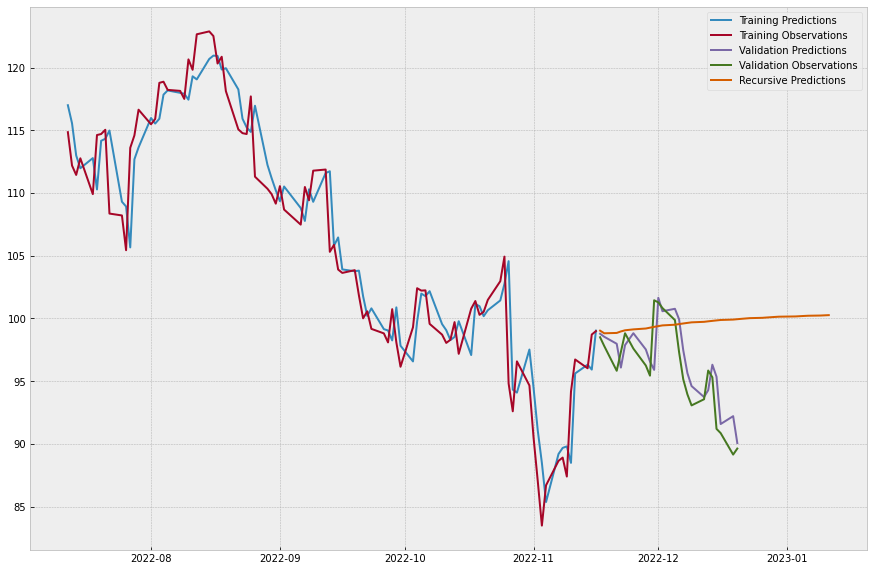

In [262]:
plot_predictions_fn (series[WINDOW_SIZE:train_len+WINDOW_SIZE].index,LSTM_train_predictions,y_train,LSTM_val_predictions,y_val,LSTM_recursive_dates, LSTM_recursive_predictions)

In [263]:
#output prediction

LSTM_train_df = pd.DataFrame (LSTM_train_predictions,index=series[WINDOW_SIZE:train_len+WINDOW_SIZE].index)
LSTM_val_df = pd.DataFrame (LSTM_val_predictions,index=series [train_len+WINDOW_SIZE:].index)
LSTM_prediction_df = pd.DataFrame (LSTM_recursive_predictions,index=LSTM_recursive_dates)
#print ("recursive dates are ",LSTM_recursive_dates)
LSTM_final_df=LSTM_train_df.append (LSTM_val_df)
LSTM_final_df = LSTM_final_df.append (LSTM_prediction_df)

LSTM_final_df

# Save Data to File
#writer.save()

,0
2022-07-12,116.996765
2022-07-13,115.556068
2022-07-14,112.989914
2022-07-15,111.974686
2022-07-18,112.782188
...,...
2023-01-05,100.198822
2023-01-06,100.216370
2023-01-09,100.233139
2023-01-10,100.249168


# GRU

In [264]:
# GRUs parameters 

GRU_Layer1_nodes = 64
GRU_Layer2_nodes = 32
GRU_Layer3_nodes = 32
GRU_output_Layer = 1
GRU_epochs=300

keras.backend.clear_session()

GRU_model = Sequential([layers.Input((WINDOW_SIZE, 1)),
                    layers.GRU(GRU_Layer1_nodes),
                    layers.Dense(GRU_Layer2_nodes, activation='relu'),
                    layers.Dense(GRU_Layer3_nodes, activation='relu'),
                    layers.Dense(GRU_output_Layer)])

GRU_model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

GRU_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=GRU_epochs)

Epoch 1/300
3/3 [==============================] - 3s 292ms/step - loss: 11102.3447 - mean_absolute_error: 104.9281 - val_loss: 8971.5215 - val_mean_absolute_error: 94.6547
Epoch 2/300
3/3 [==============================] - 0s 19ms/step - loss: 11015.2002 - mean_absolute_error: 104.5141 - val_loss: 8883.2363 - val_mean_absolute_error: 94.1872
Epoch 3/300
3/3 [==============================] - 0s 21ms/step - loss: 10912.2510 - mean_absolute_error: 104.0183 - val_loss: 8783.8604 - val_mean_absolute_error: 93.6581
Epoch 4/300
3/3 [==============================] - 0s 19ms/step - loss: 10803.9805 - mean_absolute_error: 103.4951 - val_loss: 8686.8232 - val_mean_absolute_error: 93.1386
Epoch 5/300
3/3 [==============================] - 0s 19ms/step - loss: 10695.5264 - mean_absolute_error: 102.9708 - val_loss: 8585.2246 - val_mean_absolute_error: 92.5916
Epoch 6/300
3/3 [==============================] - 0s 19ms/step - loss: 10580.8271 - mean_absolute_error: 102.4108 - val_loss: 8473.7510 - 

3/3 [==============================] - 0s 6ms/step


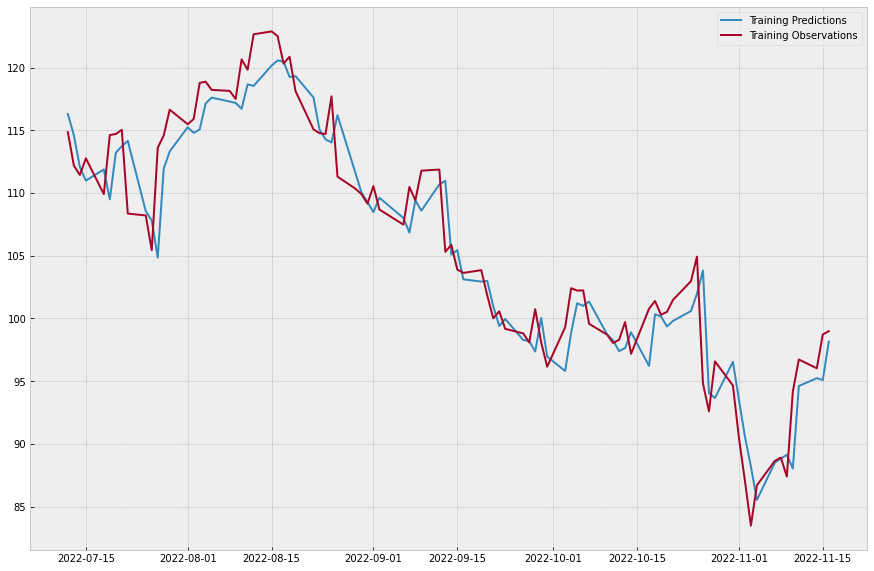

In [265]:
GRU_train_predictions= train_prediction_fn (GRU_model,X_train,y_train,series[WINDOW_SIZE:train_len+WINDOW_SIZE].index)

1/1 [==============================] - 0s 23ms/step


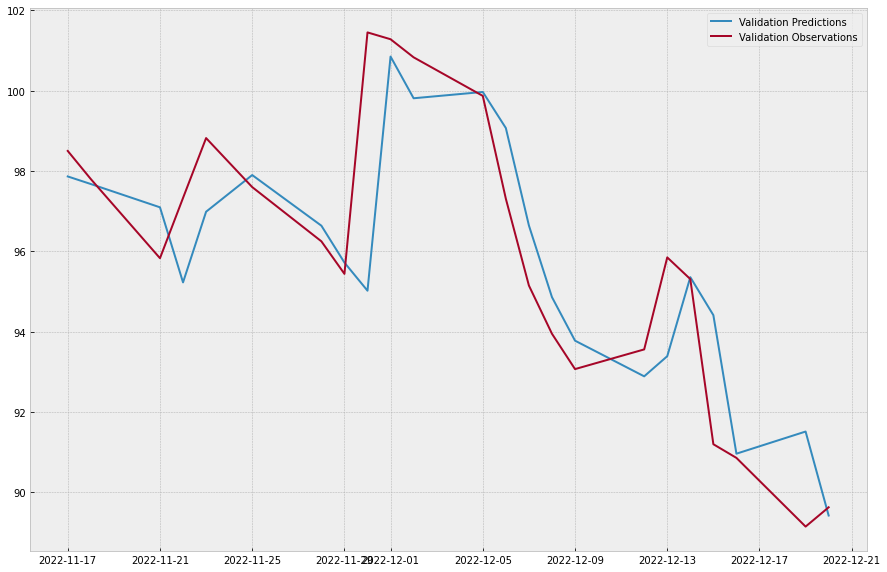

In [266]:
GRU_val_predictions =validate_prediction_fn (GRU_model,X_val,y_val,series [train_len+WINDOW_SIZE:].index)

1/1 [==============================] - 0s 22ms/step


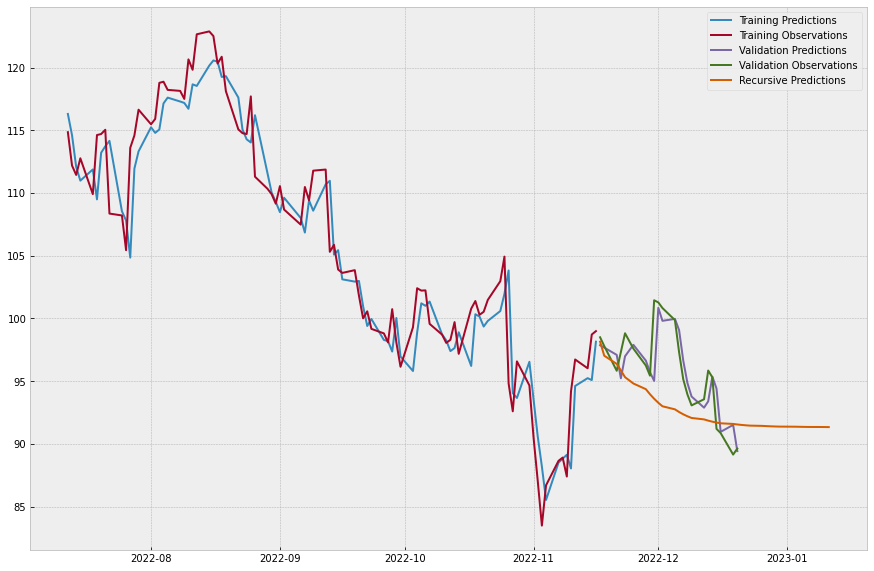

In [267]:


GRU_recursive_dates,GRU_recursive_predictions = prediction_future_fn (GRU_series_prediction_timeframe,GRU_model,X_train,series [train_len+WINDOW_SIZE:].index)
plot_predictions_fn (series[WINDOW_SIZE:train_len+WINDOW_SIZE].index,GRU_train_predictions,y_train,GRU_val_predictions,y_val,GRU_recursive_dates, GRU_recursive_predictions)

In [268]:
#output prediction

GRU_train_df = pd.DataFrame (GRU_train_predictions,index=series[WINDOW_SIZE:train_len+WINDOW_SIZE].index)
GRU_val_df = pd.DataFrame (GRU_val_predictions,index=series [train_len+WINDOW_SIZE:].index)
GRU_prediction_df = pd.DataFrame (GRU_recursive_predictions,index=GRU_recursive_dates)

GRU_final_df=GRU_train_df.append (GRU_val_df)
GRU_final_df = GRU_final_df.append (GRU_prediction_df)

# Create a Pandas Excel writer using XlsxWriter
#writer = pd.ExcelWriter('./Stocks Prediction/"MSFT.xlsx', engine='xlsxwriter')

GRU_final_df

,0
2022-07-12,116.301315
2022-07-13,114.604233
2022-07-14,112.072685
2022-07-15,110.985657
2022-07-18,111.876991
...,...
2023-01-05,91.357841
2023-01-06,91.352478
2023-01-09,91.347984
2023-01-10,91.344223


# **ARMA**

In [269]:
lrets = np.log(data['Adj Close']/data['Adj Close'].shift(1)).dropna()

print (lrets)

# forecast start date
last_day = lrets.last('D').index
#start_date = last_day.date + timedelta(days=1)

max_lag = 30
#forecast_period =21

Date
2010-01-05   -0.004413
2010-01-06   -0.025532
2010-01-07   -0.023555
2010-01-08    0.013243
2010-01-11   -0.001513
                ...   
2022-12-22   -0.022297
2022-12-23    0.017409
2022-12-27   -0.021155
2022-12-28   -0.016859
2022-12-29    0.028393
Name: Adj Close, Length: 3270, dtype: float64


In [270]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [271]:
# plot the residuals
def plt_residuals (model_res):
  residualsDF = pd.DataFrame(model_res.resid)
  #residuals = model_res
  residualsDF.plot()
  residualsDF.plot(kind='kde')
  plt.show()
  print(residualsDF.describe())
  _ = tsplot(model_res.resid, lags=max_lag)
  
  return

In [272]:
# Notice I've selected a specific time period to run this analysis


TS = lrets.loc[ARMA_series_start_date:ARMA_series_end_date]

In [273]:
# Create a n day forecast of the ticker selecetd and returns with 95%, 99% CI
#n_steps = forecast_period

def forecast_stock(start_date,best_mdl,n_steps,original_TS,train=True):
  

  f, err95, ci95 = best_mdl.forecast(steps=n_steps) # 95% CI
  _, err99, ci99 = best_mdl.forecast(steps=n_steps, alpha=0.01) # 99% CI



  #idx = pd.date_range(data.index[-1], periods=n_steps, freq='D')
  #print(start_date)
  if (train):
    idx=original_TS.index
  else:
    idx=pd.bdate_range(start=start_date, periods=n_steps, freq='C',holidays=['2022-11-24','2023-01-01'])

  fc_95 = pd.DataFrame(np.column_stack([f, ci95]),index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
  fc_99 = pd.DataFrame(np.column_stack([ci99]),index=idx, columns=['lower_ci_99', 'upper_ci_99'])
  fc_all = fc_95.combine_first(fc_99)
  #print (fc_all)
  
  return fc_all


In [274]:
# plot ur forecast 

def plot_stock (model,stock,ticker_data,n_steps,ticker_symb):
  
  plt.style.use('bmh')
  fig = plt.figure(figsize=(9,7))
  ax = plt.gca()

  # get historical data for last 1/3 of the readings
  #historical_len = int (1/3*len (stock))
  #ts_ticker = stock.iloc[-historical_len:].copy()
  ts_ticker = stock.copy()
  
  
  ticker_x = ticker_symb+' Returns'
  print (ticker_x)

  ts_ticker.plot (ax=ax,label=ticker_x)
  

  # in sample prediction
  pred = model.predict(ts_ticker.index[0], ts_ticker.index[-1])
  
  
  pred.plot(ax=ax, style='r-', label='In-sample prediction')
  styles = ['b-','0.2', '0.75', '0.2', '0.75']
  
  ticker_data.plot(ax=ax, style=styles)
  plt.fill_between(ticker_data.index, ticker_data.lower_ci_95, ticker_data.upper_ci_95, color='gray', alpha=0.7)
  plt.fill_between(ticker_data.index, ticker_data.lower_ci_99, ticker_data.upper_ci_99, color='gray', alpha=0.2)
  plt.title('{} Day MSFT Return Forecast\nARIMA{}'.format(n_steps, model))
  plt.legend(loc='best', fontsize=10)

  return

In [275]:
def forecast_tkr_stocks(ticker_data,ticker_predicted_retruns,prediction_period,train=True):

  ticker_predicted_retruns['Predicted_Price'] = np.empty (prediction_period)
    
  if (train):
    ticker_predicted_retruns['Predicted_Price'][0]=ticker_data[0]
  else:
    ticker_predicted_retruns['Predicted_Price'][0]=float (ticker_data.iloc[-1])
    print (ticker_predicted_retruns['Predicted_Price'][0])


  if (train):
    for i in range(1,prediction_period):
      ticker_predicted_retruns['Predicted_Price'][i]=float(ticker_predicted_retruns['Predicted_Price'][i-1]* np.exp(ticker_predicted_retruns['forecast'][i]))
  else:

    for i in range (0,prediction_period):
      if (i==0):
        ticker_predicted_retruns['Predicted_Price'][i]=float(ticker_data.iloc[-1]* np.exp(ticker_predicted_retruns['forecast'][i]))
      else:
        ticker_predicted_retruns['Predicted_Price'][i]=float(ticker_predicted_retruns['Predicted_Price'][i-1]* np.exp(ticker_predicted_retruns['forecast'][i]))
  
  return ticker_predicted_retruns
    
  

In [276]:
def _get_best_model_ARMA(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    pq_rng = range(5) # [0,1,2,3,4]
    for i in pq_rng:
      for j in pq_rng:
        try:

          tmp_mdl = smt.ARMA(TS, order=(i,j)).fit(method='mle', trend='nc')
          tmp_aic = tmp_mdl.aic
          if tmp_aic < best_aic:

            best_aic = tmp_aic
            best_order = (i,j)
            best_mdl = tmp_mdl
          
        except: continue
    
    p('aic: {:6.5f} | order: {}'.format(best_aic, best_order))                    
    
    return best_aic, best_order, best_mdl

aic: -562.27855 | order: (2, 3)


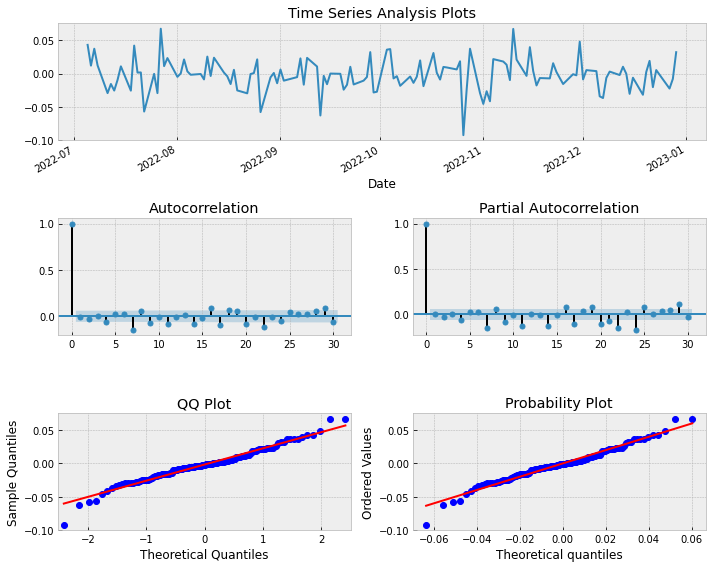

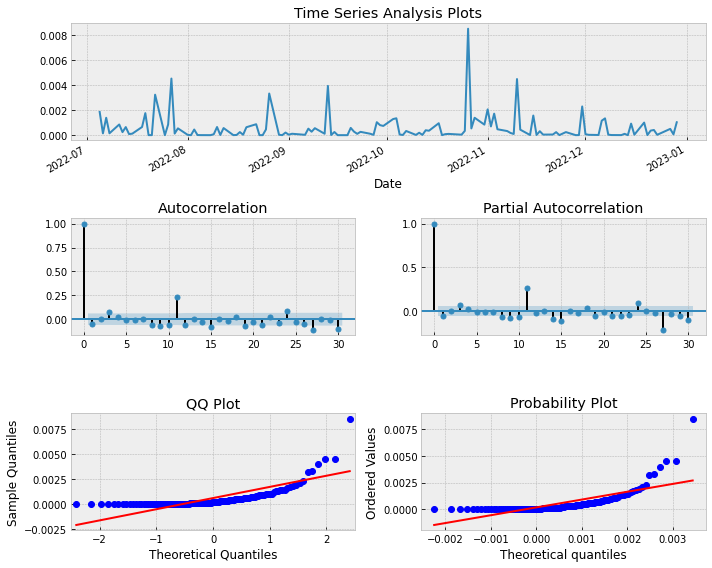

In [277]:
best_ARMA_aic,best_ARMS_order, best_model_ARMA = _get_best_model_ARMA(TS) 

#plt_residuals (best_model_ARMA)

#plot ARMA
_ = tsplot(best_model_ARMA.resid, lags=30)
#_ = tsplot(best_model_ARMA, lags=30)

# plot residuals of ARIMA
_ = tsplot((best_model_ARMA.resid)**2, lags=30)

Date
2022-07-05    0.043116
2022-07-06    0.011580
2022-07-07    0.034905
2022-07-08    0.007203
2022-07-11   -0.030811
Name: Adj Close, dtype: float64
GOOG Returns


125

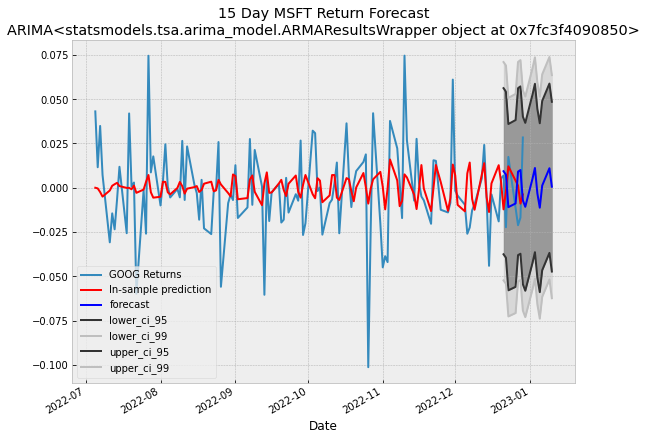

In [278]:
# Forecast ARIMA for prediction_period days




print (TS[:ARMA_series_start_predict].head())

train_ticker_data_ARMA = forecast_stock(startdate_12Y,best_model_ARMA,len (TS[:series_end_date]),TS[:series_end_date],train=True)
forecast_ticker_data_ARMA = forecast_stock(ARMA_series_start_predict,best_model_ARMA,ARMA_prediction_period,TS[:ARMA_series_start_predict],train=False)
#print ("Forecast ARMA \n",forecast_ticker_data_ARMA)
#print ("lerts \n",lrets)
plot_stock (best_model_ARMA,TS,forecast_ticker_data_ARMA,ARMA_prediction_period,y_symbol[0])
len (TS)

In [279]:
train_forecast= forecast_tkr_stocks (data['Adj Close'][ARMA_series_start_date:],train_ticker_data_ARMA,len (TS[:series_end_date]),train=True)
#train_forecast= forecast_tkr_stocks (TS,train_ticker_data_ARMA,len (TS[:series_end_date]),train=True)
train_forecast

,forecast,lower_ci_95,lower_ci_99,upper_ci_95,upper_ci_99,Predicted_Price
Date,,,,,,
2022-07-05,0.009337,-0.037559,-0.052295,0.056234,0.070970,113.887001
2022-07-06,0.007369,-0.039534,-0.054272,0.054271,0.069009,114.729300
2022-07-07,-0.010950,-0.057896,-0.072648,0.035997,0.050748,113.479888
2022-07-08,-0.008853,-0.055933,-0.070727,0.038228,0.053022,112.479740
2022-07-11,0.009106,-0.038043,-0.052858,0.056254,0.071069,113.508603
...,...,...,...,...,...,...
2022-12-14,0.001408,-0.047964,-0.063478,0.050780,0.066294,113.624420
2022-12-15,0.000742,-0.048632,-0.064147,0.050116,0.065631,113.708745
2022-12-16,-0.001234,-0.050609,-0.066124,0.048140,0.063655,113.568459


In [280]:
forecast_ticker_data_ARMA

,forecast,lower_ci_95,lower_ci_99,upper_ci_95,upper_ci_99
2022-12-21,0.009337,-0.037559,-0.052295,0.056234,0.070970
2022-12-22,0.007369,-0.039534,-0.054272,0.054271,0.069009
2022-12-23,-0.010950,-0.057896,-0.072648,0.035997,0.050748
2022-12-26,-0.008853,-0.055933,-0.070727,0.038228,0.053022
2022-12-27,0.009106,-0.038043,-0.052858,0.056254,0.071069
2022-12-28,0.009982,-0.037262,-0.052107,0.057227,0.072072
2022-12-29,-0.007149,-0.054484,-0.069357,0.040185,0.055058
2022-12-30,-0.010754,-0.058151,-0.073044,0.036642,0.051536
2023-01-02,0.005144,-0.042361,-0.057287,0.052648,0.067575
2023-01-03,0.011173,-0.036366,-0.051304,0.058712,0.073650


In [281]:
# here you should pass the last predicted data from the train_forecast dataframe

forecast_tkr_ARMA_predict=forecast_tkr_stocks (train_forecast['Predicted_Price'],forecast_ticker_data_ARMA,ARMA_prediction_period,train=False)
forecast_tkr_ARMA_predict

113.58297455431571


,forecast,lower_ci_95,lower_ci_99,upper_ci_95,upper_ci_99,Predicted_Price
2022-12-21,0.009337,-0.037559,-0.052295,0.056234,0.070970,114.648514
2022-12-22,0.007369,-0.039534,-0.054272,0.054271,0.069009,115.496445
2022-12-23,-0.010950,-0.057896,-0.072648,0.035997,0.050748,114.238679
2022-12-26,-0.008853,-0.055933,-0.070727,0.038228,0.053022,113.231843
2022-12-27,0.009106,-0.038043,-0.052858,0.056254,0.071069,114.267585
2022-12-28,0.009982,-0.037262,-0.052107,0.057227,0.072072,115.413971
2022-12-29,-0.007149,-0.054484,-0.069357,0.040185,0.055058,114.591772
2022-12-30,-0.010754,-0.058151,-0.073044,0.036642,0.051536,113.366044
2023-01-02,0.005144,-0.042361,-0.057287,0.052648,0.067575,113.950649
2023-01-03,0.011173,-0.036366,-0.051304,0.058712,0.073650,115.230959


In [282]:
forecast_ARMA = pd.DataFrame (train_forecast['Predicted_Price'],index=train_forecast.index)
#forecast_ARMA.append (forecast_tkr_ARMA_predict['Predicted_Price'])


In [283]:
forecast_tkr_ARMA_predict_df=pd.DataFrame(forecast_tkr_ARMA_predict['Predicted_Price'])

In [284]:
forecast_ARMA_final_df=forecast_ARMA.append (forecast_tkr_ARMA_predict_df)
forecast_ARMA_final_df

,Predicted_Price
2022-07-05,113.887001
2022-07-06,114.729300
2022-07-07,113.479888
2022-07-08,112.479740
2022-07-11,113.508603
...,...
2023-01-04,114.868938
2023-01-05,113.583439
2023-01-06,113.721279
2023-01-09,114.981467


# **Plot all predictions together**

In [294]:
fig,ax = plt.subplots (1,1,figsize=(10,10))
ax.plot (series,label="Original")
ax.plot (forecast_ARMA_final_df['Predicted_Price'],label="ARIMA")
ax.plot (LSTM_final_df,label="LSTM")
ax.plot (GRU_final_df,label="GRU")
fig.savefig(Stock_prediction_output_path)
plt.close(fig)


# **Output file**

In [295]:
# Create a Pandas Excel writer using XlsxWriter
output_path = './Stocks Prediction/'+ y_symbol[0]+'.xlsx'
writer = pd.ExcelWriter(output_path, engine='xlsxwriter')


#Ticker full historical data
ticker.to_excel(writer, sheet_name='historical_adj_close', index=True)




#ticker volume
ticker_Volume.to_excel(writer, sheet_name='volume', index=True)

#ticker min and max prices / Q
min_max_df.to_excel(writer, sheet_name='min_max_q', index=True)

#holders
ticker_holders_df.to_excel(writer, sheet_name='holders', index=True)

#Instit holders
ticker_instit_holders_df.to_excel(writer, sheet_name='Instit holders', index=True)

#quarter earnings
q_earnings_df.to_excel(writer, sheet_name='q_earnings', index=True)

#Recommendations
recommendations_df.to_excel(writer, sheet_name='recomm', index=True)

#Analysts Price Recommendations
analyst_price_target_df.to_excel(writer, sheet_name='analyst_p_recom', index=True)

#Revenue Forecast
revenue_forecasts_df.to_excel(writer, sheet_name='rev_forecast', index=True)

#News
news_df.to_excel(writer, sheet_name='news', index=True)

#options calls
options_calls.to_excel(writer, sheet_name='options_calls', index=True)

#options puts
options_puts.to_excel(writer, sheet_name='options_puts', index=True)


#ARMA forecast
forecast_ARMA_final_df.to_excel(writer,sheet_name='ARMA',index=True)

#final_df.to_excel("./Stocks Prediction/LSTM3_Ticker.xlsx")
LSTM_final_df.to_excel(writer, sheet_name='LSTM', index=True)


#final_df.to_excel("./Stocks Prediction/LSTM3_Ticker.xlsx")
GRU_final_df.to_excel(writer, sheet_name='GRU', index=True)


# Save Data to File
writer.save()

print (writer)

writer.close()

In [296]:
# Save charts
from openpyxl import load_workbook
from openpyxl.drawing.image import Image

#description chart
wb = load_workbook(output_path)
ws = wb.create_sheet('price_diff_charts')
ws['A1'] = 'Charts showing price and differences'
img = Image(Stock_desc_output_path)
ws.add_image(img, 'A2')

#decomposition chart
ws2 = wb.create_sheet('Decom_charts')
ws2['A1'] = 'Charts stock decomposition'
img = Image(Stock_decomposed_output_path)
ws2.add_image(img, 'A2')

#prediction chart
ws2 = wb.create_sheet('Prediction_charts')
ws2['A1'] = 'Charts stock Prediction'
img = Image(Stock_prediction_output_path)
ws2.add_image(img, 'A2')


wb.save(output_path)


# **What is next ?**

1- Optimize prediction further

2- Chart for 3 methods prediction together

3- Sentiment Analysis for News

4- Multi-variate forecasting methods

5- Do simple MA and Exp MA

6- Make a front-end

7- Put orders and stop loss based on analysis